In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

# Regresión

### Por minimos cuadrados

$$ S_e = \sum^{n}_{i=0} [P(x_i) - y_i]^2 = e_i^2 $$ 

### Regresión Lineal

$$ y = P(x) = a_0 + a_1x \\ \Rightarrow S_e = \sum^{n}_{i=0} [a_0 + a_1x_i - y_i]^2 = e_i^2$$

Obteniendo las siguientes derivadas parciales e igualandolas a cero:

$$ \frac{\partial S_e}{\partial a_0} = 2 \sum [(a_0 +a_1x_i) - y_i]  = 0 $$  

$$ \frac{\partial S_e}{\partial a_1} = 2 \sum [(a_0 +a_1x_i) - y_i] (x_i) = 0 $$ 

$$ \Rightarrow \sum [(a_0 +a_1x_i) - y_i]  = 0 \\  \sum [(a_0 +a_1x_i) - y_i] (x_i) = 0 $$  

Obtenemos un sistema de ecuaciones y resolvemos.



In [4]:
#Calcular los coeficientes de la recta de Regresión
def CoefsLineal(x,y,n):
    a = np.zeros(2)
    p = np.sum(x)
    q = np.sum(y)
    r = np.sum(x*x)
    s = np.sum(x*y)
    det = (n+1)*r - p*p
    a[0] = (q*r - p*s) / det
    a[1] = ((n+1)*s - p*q) / det
    return a

In [5]:
#Evaluar un punto en la recta
def RegLineal(a,t):
    pt = a[0] + a[1]*t
    return pt

In [6]:
#ejemplo
x = np.arange(1,11, dtype=float)
y = np.array([1.3,3.5,4.2,5.0,7.0,8.8,10.1,12.5,13.0,15.6], dtype=float)
n = len(x)-1


In [7]:
#Calcular los coeficientes
a = CoefsLineal(x,y,n)

#Evaluar un punto
t = 11
pt = RegLineal(a,t)
pt

16.56

In [8]:
#Evaluar un conjunto de puntos
t = x
pt = RegLineal(a,t)
pt

array([ 1.17818182,  2.71636364,  4.25454545,  5.79272727,  7.33090909,
        8.86909091, 10.40727273, 11.94545455, 13.48363636, 15.02181818])

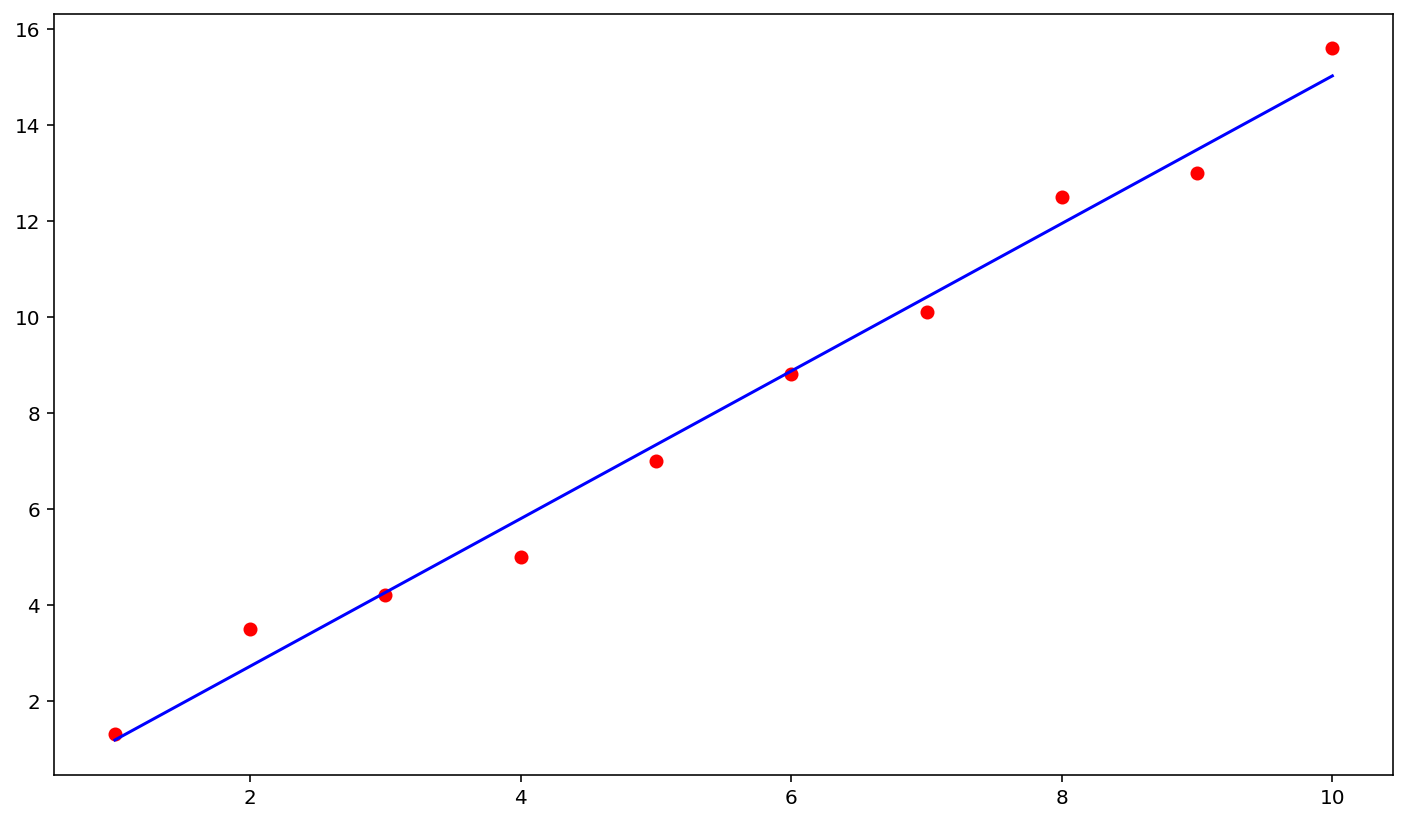

In [9]:
#Graficar los nodos
plt.plot(x,y,"or")

#Graficar recta de regresion
ts = np.linspace(np.min(x), np.max(x), 100)
Pts = RegLineal(a,ts)
plt.plot(ts,Pts, "b")

In [10]:
#Predecir t = 11
t = 11
pt = RegLineal(a,t)
pt

16.56

In [11]:
tabla = np.loadtxt('temp_puebla.txt')
x = tabla[:,0]
y = tabla[:,1]
n = len(x) - 1

a = CoefsLineal(x,y,n)
print(a)

#Graficar los nodos
plt.plot(x,y,"or")

#Graficar recta de regresion
ts = np.linspace(np.min(x), np.max(x), 100)
Pts = RegLineal(a,ts)
plt.plot(ts,Pts, "b")

[-1.11113369e+02  6.37614170e-02]


In [12]:
#Predecir t = 11
t = 2060
pt = RegLineal(a,t)
pt

20.235150192960518

In [13]:
x = np.arange(2015,2023, dtype=float)
y = np.array([9,9,11,8,6,4,6,6], dtype=float)
n = len(x) -1

a = CoefsLineal(x,y,n)
print(a)

#Graficar los nodos
plt.plot(x,y,"or")

#Graficar recta de regresion
ts = np.linspace(np.min(x), np.max(x), 100)
Pts = RegLineal(a,ts)
plt.plot(ts,Pts, "b")

[ 1.42513095e+03 -7.02380952e-01]


In [14]:
t = 2030
pt = RegLineal(a,t)
pt

-0.7023809523809632

###Algoritmo para construir la matriz C 

**Entrada:** $x,n$
**Salida:** $c$ 

- Crear $ C \in R_{n+1 * 3} $
- $ C_{col-1} ---- 1 $
- Para $i <-- 1$  hasta $2$
	- $ C_{col-i} <-- x*C_{col- (i-1)} $
- FinPara
- Regresar C

In [15]:
def MatC(x,n):
     C = np.ones([n+1, 3])
     for i in range(1,3):
        C[:,i] = x * C[:,i-1]
     return C

In [16]:
x = np.array([0,2,3,5], dtype=float)
y = np.array([-1,0,2,1],dtype=float)
n = len(x) - 1

In [17]:
MatC(x,n)

array([[ 1.,  0.,  0.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  5., 25.]])

### Algoritmo para calcular los coeficientes de P_2(x) de regresión
**Entrada:** $x,y$
**Salida:** $a$

- $ C <-- matC(x,n)$
- $ B <-- C^T C$
- $ z <-- C^T y $
- $ a <-- Solución(B,z) $
- Regresar a

In [18]:
def coefsCuadratica(x,y,n):
    #Construir las matrices C y Ct
    C = MatC(x,n)
    Ct = np.transpose(C)

    #Crear sistemas de ecuaciones
    B = np.dot(Ct,C)
    z = np.dot(Ct,y)

    #Resolver sistema
    a = np.linalg.solve(B,z)
    return a

In [19]:
a = coefsCuadratica(x,y,n)
a

array([-1.15384615,  1.29487179, -0.16666667])

In [20]:
from poly import *
#Evaluar un punto
escPol("P",a,2)

P(x) = -1.15+1.29 x -0.17 x^2 



In [21]:
#Graficar polinomio
ts = np.linspace(np.min(x), np.max(x), 100)
Pts = Ruffini(a,2,ts)

plt.plot(ts,Pts)
plt.plot(x,y,"o")

 ## Regresión Polinomial (Simple)  

Se tienen $n+1$ ountos entonces $ 1 \leq k  \leq n-1 $ se busca minimizar $$ S = \sum^{n}_{i=0} [P_k(x_i) - y_i]^2 $$

#### Algoritmo para construir la matriz C_n+1*k+1  (matC_k)
**Entrada:** x,n,k
**Salida:** c
- Crear matriz C_n+1*k+1
- C_col1 <-- 1
- Para k <-- 1 hasta k
	- C_colk <-- x* C_colk-1
- Fin para
- Regresar C

#### Algortmo para calcular los coeficientes P_k(x)
**Entrada:** x,y,n,k
**Salida:** a
- C <-- matC_k(x,n,k)
- B <-- CC^t
- z <-- C^t y
- a <-- serolver sistema(B,z)
- Regresar a

In [22]:
def matCk(x,n,k):
    C = np.ones([n+1,k+1])
    for i in range(1,k+1):
        C[:,i] = x * C[:,i-1]
    return C

In [23]:
def CoefsRegresionPol(x,y,n,k):
    C = matCk(x,n,k)
    Ct = np.transpose(C)
    #print(Ct)
    B = np.dot(Ct,C)
    #print(B)
    z = np.dot(Ct,y)
    #print(z)
    a = np.linalg.solve(B,z)
    return a

In [24]:
x = np.array([0,2,3,5], dtype=float)
y = np.array([-1,0,2,1], dtype=float)
n = len(x)-1
k = 1
C = matCk(x,n,k)
a = CoefsRegresionPol(x,y,n,k)
a

array([-0.65384615,  0.46153846])

In [25]:
k2 = 2
C2 = matCk(x,n,k2)
a2 = CoefsRegresionPol(x,y,n,k2)
a2

array([-1.15384615,  1.29487179, -0.16666667])

In [26]:
plt.plot(x,y,"o")

tx = np.linspace(0,5,100)

a1 = CoefsRegresionPol(x,y,n,k)
a2 = CoefsRegresionPol(x,y,n,k2)

Pt1 = Ruffini(a1,k,tx)
Pt2 = Ruffini(a2,k2,tx)

plt.plot(tx,Pt1)
plt.plot(tx,Pt2)

In [27]:
x = np.array([0,2,3,5], dtype=float)
y = np.array([-1,0,2,1], dtype=float)
n = len(x)-1

plt.plot(x,y,"o")

#Generar todos los pol 
for i in range(1,n):
    k = i
    C = matCk(x,n,k)
    a = CoefsRegresionPol(x,y,n,k)
    escPol("p", a, k)

    tx = np.linspace(0,5,100)
    Pt = Ruffini(a,k,tx)
    plt.plot(tx,Pt)


p(x) = -0.65+0.46 x 

p(x) = -1.15+1.29 x -0.17 x^2 



## Cuantificación - Coeficiente de determinación

$$ r^2 = \dfrac{S_t- S_e}{S_t} $$

In [28]:
def sumSe(x,y,k,a):
    px = Ruffini(a,k,x)
    dif = px - y
    pot = dif*dif
    suma = np.sum(pot)
    return suma

In [29]:
def sumSt(y,n):
    sum = np.sum(y)
    prom = sum/(n+1)
    dif = y - prom
    pot = dif*dif
    suma = np.sum(pot)
    return suma

In [30]:
def coefR2(Se,St):
    r2 = (St-Se)/St
    return r2

In [31]:
x = np.array([0,2,3,5], dtype=float)
y = np.array([-1,0,2,1], dtype=float)
n = len(x)-1
k = 1
C = matCk(x,n,k)
a = CoefsRegresionPol(x,y,n,k)

In [32]:
#Prueba
Se = sumSe(x,y,k,a)
print(Se)

2.230769230769231


In [33]:
#Prueba
St = sumSt(y,n)
print(St)

5.0


In [34]:
#Prueba
r = coefR2(Se,St)
r

0.5538461538461539

In [35]:
x = np.array([0,2,3,5], dtype=float)
y = np.array([-1,0,2,1], dtype=float)
n = len(x)-1

plt.plot(x,y,"o")

for i in range(1,n):
    k = i
    a = CoefsRegresionPol(x,y,n,k)
    Se = sumSe(x,y,k,a)
    St = sumSt(y,n)
    r = coefR2(Se,St)
    escPol("p", a, k)
    print("Coeficiente de determinación ",r)

    tx = np.linspace(0,5,100)
    Pt = Ruffini(a,k,tx)
    plt.plot(tx,Pt)

p(x) = -0.65+0.46 x 

Coeficiente de determinación  0.5538461538461539
p(x) = -1.15+1.29 x -0.17 x^2 

Coeficiente de determinación  0.7538461538461536


In [36]:
x = np.array([0.25,1.0,1.5,2,2.4,5], dtype = float)
y = np.array([23.1,1.68,1.0,0.84,0.826,1.2576], dtype = float)
n = len(x)-1

plt.plot(x,y,"o")

for i in range(1,n):
    k = i
    a = CoefsRegresionPol(x,y,n,k)
    Se = sumSe(x,y,k,a)
    St = sumSt(y,n)
    r = coefR2(Se,St)
    escPol("p", a, k)
    print("Coeficiente de determinación r^2 = %f \n"%r)

    tx = np.linspace(0.25,5,100)
    Pt = Ruffini(a,k,tx)
    plt.plot(tx,Pt)

p(x) = 10.68-2.91 x 

Coeficiente de determinación r^2 = 0.283320 

p(x) = 22.93-16.96 x +2.55 x^2 

Coeficiente de determinación r^2 = 0.781293 

p(x) = 33.04-46.51 x +19.51 x^2 -2.30 x^3 

Coeficiente de determinación r^2 = 0.975627 

p(x) = 39.92-80.93 x +58.39 x^2 -17.15 x^3 +1.68 x^4 

Coeficiente de determinación r^2 = 0.998727 



## Regresión multiple 

#### Algoritmo para determinar los coeficientes de la regresión lineal multiple

**Entrada:** $X_{n \times k} , y_n , k, n$
**Salida:** $a$

1. Crear $C \in R_{n+1 \times m+1}$
2. $C_{col 1}$ <--- 1
3. $C_{COL 1....m+1}$ <--- X
4. B <-- $C^TC$
5. z <-- $C^Ty$
6. a <-- resolver$(B,z)$
7. Regresar $a$

#### Algoritmo para evaluar un punto $t=(t_1,t_2,...,t_m)$ en el modelo de regresión

**Entrada:** $a, t\in R^m, m$
**Salida:** y(t)

1. y <-- $a_0 + a_{1,...,m+1} * t$
2. Regresar y

In [37]:
def coefsLinMult(x,y,m,n):
    C = np.ones([n+1,m+1])
    C[:,1:] = x
    Ct = np.transpose(C)
    B = np.dot(Ct,C)
    z = np.dot(Ct,y)
    a = np.linalg.solve(B,z)
    return a

In [38]:
def regresionMul(a,t):
    y = a[0] + np.sum(a[1:]*t)
    return y

In [39]:
def regresionMulVec(a,ts):
    n = ts.shape[0]
    pts = np.zeros(n)
    for i in range(n):
        pts[i] = regresionMul(a,ts[i,:])
    return pts

In [40]:
x = np.array([[0,0],[2,1],[2.5,2],[1,3],[4,6],[7,2]], dtype=float)
y = np.array([5,10,9,0,3,27], dtype=float)
n = x.shape[0]-1
m = x.shape[1]


In [41]:
a = coefsLinMult(x,y,m,n)
a

array([ 5.,  4., -3.])

In [42]:
ts = np.array([[0,0],[2,1],[2.5,2],[1,3],[4,6],[7,2]], dtype=float)
t = ts.shape
t

(6, 2)

In [43]:
pts = regresionMulVec(a,ts)
pts

array([ 5., 10.,  9.,  0.,  3., 27.])

In [44]:
def plotRegMul(a,tx1,nx1,tx2,nx2):
    #nx1 = len(tx1)
    #nx2 = len()
    z = np.zeros([nx1,nx2])
    for i in range(nx1):
        for j in range(nx2):
            z[i,j] = regresionMul(a,[tx1[i],tx2[j]])

    return z

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = np.array([[0,0],[2,1],[2.5,2],[1,3],[4,6],[7,2]], dtype=float)
y = np.array([5,10,9,0,3,27], dtype=float)
n = x.shape[0]-1
m = x.shape[1]
a = coefsLinMult(x,y,m,n)

x1 = x[:,0]
x2 = x[:,1]

tx1 = np.linspace(np.min(x1) , np.max(x2), 20)
tx2 = np.linspace(np.min(x2) , np.max(x2), 20)

#tx1 = np.linspace(x[0,0] , x[x.shape[0]-1,0], 30)
#tx2 = np.linspace(x[0,1] , x[x.shape[0]-1,0], 30)
nx1 = len(tx1)
nx2 = len(tx2)
Z = plotRegMul(a,tx1,nx1,tx2,nx2)

#x1 = np.array([0,2,2.5,1,4,7], dtype=float)
#x2 = np.array([0,1,2,3,6,2], dtype=float)

ax.scatter(x1,x2,y, color="r")
X, Y = np.meshgrid(tx1,tx2)
ax.plot_wireframe(Y,X,Z)
ax.view_init(30,60)
plt.show()

## Cuantificación - Coeficiente de determinación

$$ r^2 = \dfrac{S_t- S_e}{S_t} $$

In [46]:
def sumSeMul(x,y,a):
    px = regresionMulVec(a,x)
    dif = px - y
    pot = dif*dif
    suma = np.sum(pot)
    return suma

In [47]:
def sumStMul(y,n):
    sum = np.sum(y)
    prom = sum/(n+1)
    dif = y - prom
    pot = dif*dif
    suma = np.sum(pot)
    return suma

In [48]:
def coefR2Mul(Se,St):
    r2 = (St-Se)/St
    return r2

In [49]:
x = np.array([[15,15,13],[14,13,12],[16,13,14],[20,14,16],[18,18,17],[16,17,15],[13,15,11],[16,14,15],[15,14,13],[14,13,10],[12,12,10],[16,11,14],[17,16,15],[19,14,16,],[13,15,10]], dtype=float)
y = np.array([13,13,13,15,16,15,12,13,13,13,11,14,15,15,15], dtype=float)
n = x.shape[0]-1
m = x.shape[1]
a = coefsLinMult(x,y,m,n)
Se = sumSeMul(x,y,a)
St = sumStMul(y,n)
r2 = coefR2Mul(Se,St)
print(" Se = %f \n St = %f \n r^2 = %f"%(Se,St,r2))
a

 Se = 8.159546 
 St = 26.933333 
 r^2 = 0.697047


array([ 2.55147407,  0.58268958,  0.37348258, -0.24152609])

In [50]:
x = np.array([[0,0],[2,1],[2.5,2],[1,3],[4,6],[7,2]], dtype=float)
y = np.array([5,10,9,0,3,27], dtype=float)
n = x.shape[0]-1
m = x.shape[1]
a = coefsLinMult(x,y,m,n)
Se = sumSeMul(x,y,a)
St = sumStMul(y,n)
r2 = coefR2Mul(Se,St)
print(" Se = %f \n St = %f \n r^2 = %f"%(Se,St,r2))

 Se = 0.000000 
 St = 458.000000 
 r^2 = 1.000000


In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = np.array([[15,70],[16,65],[24,71],[13,64],[21,84],[16,86],[22,72],[18,84],[20,71],[16,75],[28,84],[27,79],[13,80],[22,76],[23,88]], dtype=float)
y = np.array([156,157,177,145,197,184,172,187,157,169,200,193,167,170,192], dtype=float)

n = x.shape[0]-1

m = x.shape[1]

a = coefsLinMult(x,y,m,n)
print("Coeficientes : ",a)
Se = sumSeMul(x,y,a)
St = sumStMul(y,n)
r2 = coefR2Mul(Se,St)
print(" Se = %f \n St = %f \n r^2 = %f"%(Se,St,r2))

x1 = x[:,0]
x2 = x[:,1]

tx1 = np.linspace(np.min(x1) , np.max(x1), 20)
tx2 = np.linspace(np.min(x2) , np.max(x2), 20)
nx1 = len(tx1)
nx2 = len(tx2)
Z = plotRegMul(a,tx1,nx1,tx2,nx2)
#print(Z)

ax.scatter(x1,x2,y, color="r")
X, Y = np.meshgrid(tx1,tx2)
ax.plot_wireframe(X,Y,Z)
ax.view_init(10,190)
plt.show()

Coeficientes :  [25.71153011  1.58181798  1.54244784]
 Se = 343.541557 
 St = 3993.733333 
 r^2 = 0.913980


# TAREA
## Investigar una medida de "colinearidad" e implementarlo. (Para saber si es posible aplicar la regresion)

Generalmente se considera que existe colinealidad cuando el factor de inflación entre dos variables es mayor de 10 o cuando la media de todos los factores de inflación de todas las variables independientes es muy superior a uno.


# Colinealidad

 La colinealidad es un problema que surge cuando las variables explicativas del modelo están altamente correlacionadas entre sí. Este es un problema complejo, porque en cualquier regresión las variables explicativas
van a presentar algún grado de correlación.
Matemáticamente, decimos que existe multicolinealidad cuando tenemos problemas a la hora de invertir la matriz $X^TX$
- Si $det(X^TX) \approx 0$ entonces existe colinealidad de grado
- Si $det(X^TX) = 0$ entonces existe colinealidad exacta

* Si la multicolinealidad es exacta, alguna variable explicativa es combinación lineal exacta de otras y el sistema de ecuaciones normales tiene infinitas soluciones. Fácil de detectar y de resolver
* Si la multicolinealidad es de grado, alguna variable está altamente correlacionada con otra(s), pero el sistema de ecuaciones normales tiene una única solución. Más difícil de detectar y de resolver.

## Métodos basados en la correlación muestral entre variables explicativas
Este método consiste en calcular los llamados “factores de inflación de varianza” o VIF’s definidos como:$$ VIF_j = \frac{1}{1- R^2_j} $$
donde $R^2_j$ es el coeficiente de determinación de la regresión del j-ésimo regresor sobre el resto. El valor mínimo es 1 y un VIF > 10 puede indicar la existencia colinealidad.

In [3]:
def coefsLinMult(x,y,m,n):
    C = np.ones([n+1,m+1])
    C[:,1:] = x
    Ct = np.transpose(C)
    B = np.dot(Ct,C)
    z = np.dot(Ct,y)
    a = np.linalg.solve(B,z)
    return a

def regresionMul(a,t):
    y = a[0] + np.sum(a[1:]*t)
    return y

def regresionMulVec(a,ts):
    n = ts.shape[0]
    pts = np.zeros(n)
    for i in range(n):
        pts[i] = regresionMul(a,ts[i,:])
    return pts

def sumSeMul(x,y,a,i):
    px = regresionMulVec(a,x)
    dif = px - y
    pot = dif*dif
    suma = np.sum(pot) - pot[i]
    return suma

def sumStMul(y,n,i):
    sum = np.sum(y)
    prom = sum/(n+1)
    dif = y - prom
    pot = dif*dif
    suma = np.sum(pot) - pot[i]
    return suma

def coefR2Mul(Se,St):
    r2 = (St-Se)/St
    return r2

In [5]:
import numpy as np

In [6]:
#Ejemplo

x = np.array([[0,0],[2,1],[2.5,2],[1,3],[4,6],[7,2]], dtype=float)
y = np.array([5,10,9,0,3,27], dtype=float)
n = x.shape[0]-1
m = x.shape[1]
a = coefsLinMult(x,y,m,n)
r2j = np.zeros(x.shape[1])
for i in range(x.shape[1]):
    Se = sumSeMul(x,y,a,i)
    St = sumStMul(y,n,i)
    r2j[i] = coefR2Mul(Se,St)
r2j

array([1., 1.])

In [0]:
# Cómo los factores de inflacion de varianza son 1, entonces no existe colinealidad.